# Linear Regression

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.stats import diagnostic
import statsmodels.regression as smr
from statsmodels.stats.diagnostic import het_breuschpagan

import scipy as sp
import scipy.stats

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
import datetime as dt
import seaborn

In [6]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(12, 9))

In [51]:
def ols_linreg(asset, benchmark):
    benchmark = sm.add_constant(benchmark)
    model = regression.linear_model.OLS(asset, benchmark).fit()
    alpha = model.params[0]
    beta = model.params[1]
    benchmark = benchmark[:, 1]
    
    bm2 = np.linspace(benchmark.min(), benchmark.max(), 100)
    a_hat = bm2 * beta + alpha
    plt.scatter(benchmark, asset, alpha=0.3)
    plt.plot(bm2, a_hat, 'r')
    plt.xlabel('BENCHMARK value')
    plt.ylabel('ASSET value')
    return model.summary()

In [8]:
amd_asset = pd.read_csv('../data/AMD_2002-01-01_2022-12-31_1d.csv',
                     index_col=0, parse_dates=True)
spy_benchmark = pd.read_csv('../data/SPY_2002-01-01_2022-12-31_1d.csv',
                     index_col=0, parse_dates=True)

In [15]:
amd_asset_returns = np.log(amd_asset['Close'].div(amd_asset['Close'].shift(1)))
spy_benchmark_returns = np.log(spy_benchmark['Close'].
                               div(spy_benchmark['Close'].shift(1)))

In [19]:
amd_asset_returns.dropna(inplace=True)
spy_benchmark_returns.dropna(inplace=True)

In [41]:
not_equal = amd_asset_returns.count() - spy_benchmark_returns.count()
if not_equal:
    if amd_asset_returns.count() < spy_benchmark_returns.count():
        spy_benchmark_returns = spy_benchmark_returns[np.abs(not_equal):]
    amd_asset_returns = amd_asset_returns[np.abs(not_equal):]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1868.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:57:01   Log-Likelihood:                 10641.
No. Observations:                5286   AIC:                        -2.128e+04
Df Residuals:                    5284   BIC:                        -2.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.475      0.635      -0.001       0.001
x1             1.5607      0.036     43.223      0.000       1.490       1.631
==============================================================================
Omnibus:                     1171.275   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54358.067
Skew:                          -0.026   Prob(JB):                         0.00
Kurtosis:                      18.710   Cond. No.                         81.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

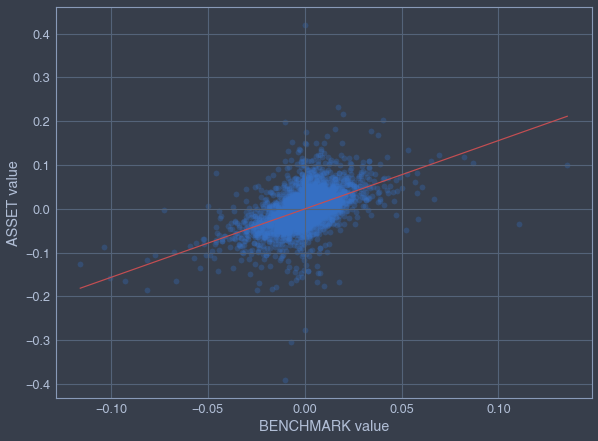

In [52]:
ols_linreg(amd_asset_returns.values, spy_benchmark_returns.values)